# Instruct Pix2Pix

Instruct Pix2Pixはテキストで指示することで画像を編集するためのモデルです．
- ドキュメント:https://huggingface.co/timbrooks/instruct-pix2pix
- GitHub:https://github.com/timothybrooks/instruct-pix2pix

<a href="https://colab.research.google.com/github/fuyu-quant/data-science-wiki/blob/main/multimodal/text_guided_image_to_image/instruct_pix2pix.ipynb" target="_blank" rel="noopener noreferrer"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!pip install diffusers==0.23.0
!pip install accelerate==0.24.1
!pip install safetensors==0.4.0
!pip install transformers==4.35.0


In [6]:
import PIL
import requests
import torch
from diffusers import StableDiffusionInstructPix2PixPipeline, EulerAncestralDiscreteScheduler
import IPython.display as display

### 元の画像

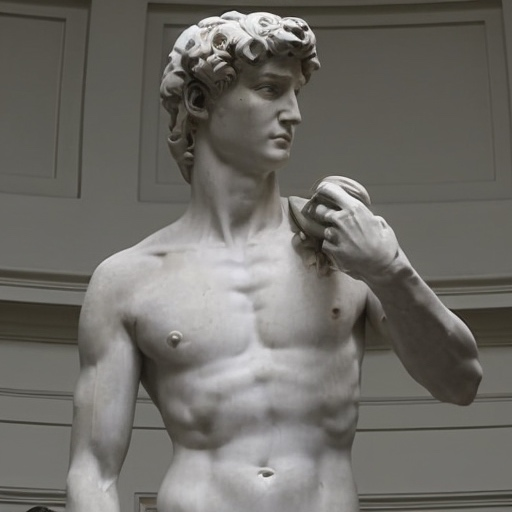

In [3]:
url = "https://raw.githubusercontent.com/timothybrooks/instruct-pix2pix/main/imgs/example.jpg"
def download_image(url):
    image = PIL.Image.open(requests.get(url, stream=True).raw)
    image = PIL.ImageOps.exif_transpose(image)
    image = image.convert("RGB")
    return image
image = download_image(url)

display.display(image)

### Instruct Pix2Pixのダウンロード

In [ ]:
pipe = StableDiffusionInstructPix2PixPipeline.from_pretrained("timbrooks/instruct-pix2pix", torch_dtype=torch.float16, safety_checker=None)
pipe.to("cuda")
pipe.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)

### Instruct Pix2Pix

  0%|          | 0/10 [00:00<?, ?it/s]

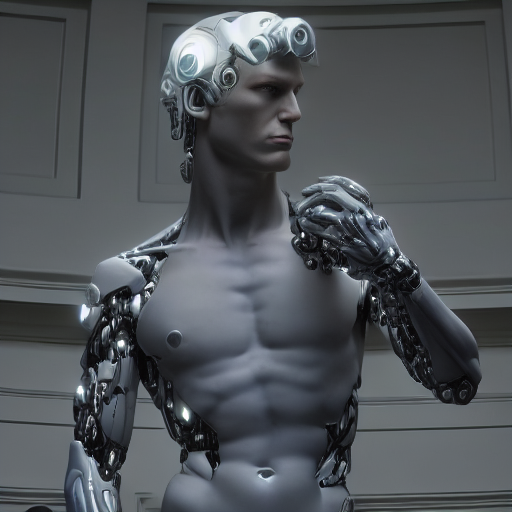

In [7]:
prompt = "turn him into cyborg"
images = pipe(prompt, image=image, num_inference_steps=10, image_guidance_scale=1).images

display.display(images[0])